In [1]:
### collision test case 2: Moon-sized object impact with Earth

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import scipy
from scipy.integrate import odeint

In [101]:
### Define constants:
m_to_au = 6.6846*10**(-12)   # au per meter           [conversion factor for distances]
G = (6.67408*10**(-11))*m_to_au**3   # au**3 / (kg * s**2)     [Gravitational constant]
T_Mercury = 7.603 * 10**6    # seconds                [seconds per Mercury year]
T_Venus = 1.944 * 10**7      # seconds                [seconds per Venus year]
T_Earth = 3.154 * 10**7      # seconds                [seconds per Earth year]
T_Mars = 5.936 * 10**7       # seconds                [seconds per Mars year]
T_Jupiter = 3.74017 * 10**8  # seconds                [seconds per Jupiter year]
T_Saturn = 9.145 * 10**8     # seconds                [seconds per Saturn year]
T_Uranus = 2.649 * 10**9     # seconds                [seconds per Uranus year]
T_Neptune = 5.203 * 10**9    # seconds                [seconds per Neptune year]

M0 = 1.989 * 10**30          # kg                     [Mass of Sun]
R0 = 695500000*m_to_au       # au                     [Radius of Sun]

M1 = 3.3 * 10**23            # kg                     [Mass of Mercury]
R1 = 2439000*m_to_au         # au                     [Radius of Mercury]
D1 = (5.79*10**10)*m_to_au   # au                     [Orbital distance Mercury-Sun]
V1 = np.sqrt(G*M0/D1)        # au/s                   [Orbital velocity of Mercury]

M2 = 4.87 * 10**24           # kg                     [Mass of Venus]
R2 = 6052000*m_to_au         # au                     [Radius of Venus]
D2 = (1.082*10**11)*m_to_au  # au                     [Orbital distance Venus-Sun]
V2 = np.sqrt(G*M0/D2)        # au/s                   [Orbital velocity of Venus]

M3 = 5.972 * 10**24          # kg                     [Mass of Earth]
R3 = 6378100*m_to_au         # au                     [Radius of Earth]
D3 = (1.496*10**11)*m_to_au  # au                     [Orbital distance Earth-Sun]
V3 = np.sqrt(G*M0/D3)        # au/s                   [Orbital velocity of Earth]

M4 = 6.42 * 10**23           # kg                     [Mass of Mars]
R4 = 3397000*m_to_au         # au                     [Radius of Mars]
D4 = (2.279*10**11)*m_to_au  # au                     [Orbital distance Mars-Sun]
V4 = np.sqrt(G*M0/D4)        # au/s                   [Orbital velocity of Mars]

M5 = 1.898 * 10**27          # kg                     [Mass of Jupiter]
R5 = 69911000*m_to_au        # au                     [Radius of Jupiter]
D5 = (7.786*10**11)*m_to_au  # au                     [Orbital distance Jupiter-Sun]
V5 = np.sqrt(G*M0/D5)        # au/s                   [Orbital velocity of Jupiter]

M6 = 5.69 * 10**26           # kg                     [Mass of Saturn]
R6 = 60268000*m_to_au        # au                     [Radius of Saturn]
D6 = (1.433*10**12)*m_to_au  # au                     [Orbital distance Saturn-Sun]
V6 = np.sqrt(G*M0/D6)        # au/s                   [Orbital velocity of Saturn]

M7 = 8.68 * 10**25           # kg                     [Mass of Uranus]
R7 = 25559000*m_to_au        # au                     [Radius of Uranus]
D7 = (2.873*10**12)*m_to_au  # au                     [Orbital distance Uranus-Sun]
V7 = np.sqrt(G*M0/D7)        # au/s                   [Orbital velocity of Uranus]

M8 = 1.03 * 10**26           # kg                     [Mass of Neptune]
R8 = 24764000*m_to_au        # au                     [Radius of Neptune]
D8 = (4.495*10**12)*m_to_au  # au                     [Orbital distance Neptune-Sun]
V8 = np.sqrt(G*M0/D8)        # au/s                   [Orbital velocity of Neptune]

###  Here I am choosing information of Asteroid Ceres:
M01 = 7.342*10**22           # kg                     [Mass of Moon-sized Asteroid]
R01 = 1737100*m_to_au        # au                     [Radius of Moon-sized Asteroid]
D01 = D3                     # au                     [Orbital distance Asteroid-Sun]
V01 = 1.5307*10**(-6)        # au/s                   [Orbital velocity of Asteroid]
Vol = (4/3)*np.pi*(R01**3)   # au**3                  [Volume of Asteroid]

### Energy of an orbit is given by: -(G*M*m) / (2*D)

#print('mass of asteroid: {}'.format(M01), 'kg')       # [print mass of asteroid for reference]
#print('velocity of asteroid: {}'.format(V01), 'm/s')  # [print velocity of asteroid for reference]

def get_energy_of_orbit(littlem, bigm, orbitdistance):
    return -(G*littlem*bigm)/(2*orbitdistance)
def get_kinetic_energy(m, v):
    return (1/2)*m*v**2

energy_earth_orbit, kinetic_asteroid = get_energy_of_orbit(M3, M0, D3), get_kinetic_energy(M01, V01)
energy_mars_orbit = get_energy_of_orbit(M4, M0, D4)
want_kinetic_asteroid = energy_mars_orbit - energy_earth_orbit

print("Energy of earth orbit to mars orbit:", want_kinetic_asteroid) # [want kinetic energy of asteroid to be this]
print('Kinetic energy of Asteroid:', kinetic_asteroid)           # [print kinetic energy of Asteroid for reference]
print('Fractional energy needed:', kinetic_asteroid / want_kinetic_asteroid)
print("Energy of Mars' orbit:", energy_mars_orbit)               # [print energy of Mars' orbit for reference]
print("Energy of Earth's orbit:", energy_earth_orbit)            # [print energy of Earth's orbit for reference]
print("Fractional energy of asteroid with respect to Earth's orbit:", kinetic_asteroid / energy_earth_orbit)

##################   Only thing that needs to be set up before running the code
Mass = [M0, M1, M2, M3, M4, M5, M6, M7, M8, M01]      # [Mass list for entire solar system]
Radius = [R0, R1, R2, R3, R4, R5, R6, R7, R8, R01]    # [Radius list to be used for collsions later]

Energy of earth orbit to mars orbit: 110040682315.01848
Kinetic energy of Asteroid: 86013089807.89998
Fractional energy needed: 0.7816480959438836
Energy of Mars' orbit: -8354832504.056031
Energy of Earth's orbit: -118395514819.07451
Fractional energy of asteroid with respect to Earth's orbit: -0.7264894277400663


In [125]:
#####  First attempt at a collision function, restarts simulation with new parameters

N = 1000001
t_test = np.linspace(0, 10*T_Neptune, N)
t_test_reverse = np.linspace(10**2, 0, N)

t1 = np.linspace(0, T_Mercury, N)
t1_reverse = np.linspace(T_Mercury, 0, N)
t3 = np.linspace(0, T_Earth, N)
t3_reverse = np.linspace(T_Earth, 0, N)
t5 = np.linspace(0, T_Jupiter, N)
t5_reverse = np.linspace(T_Jupiter, 0, N)
t8 = np.linspace(0, T_Neptune, N)

y_arr = np.array([0.0,                0.0,              0.0,                0.0,
                  D1*np.cos(np.pi),  -V1*np.sin(np.pi), D1*np.sin(np.pi),   V1*np.cos(np.pi),
                  D2*np.cos(np.pi),  -V2*np.sin(np.pi), D2*np.sin(np.pi),   V2*np.cos(np.pi),
                  D3*np.cos(np.pi),  -V3*np.sin(np.pi), D3*np.sin(np.pi),   V3*np.cos(np.pi),
                  D4*np.cos(np.pi),  -V4*np.sin(np.pi), D4*np.sin(np.pi),   V4*np.cos(np.pi),
                  D5*np.cos(np.pi),  -V5*np.sin(np.pi), D5*np.sin(np.pi),   V5*np.cos(np.pi),
                  D6*np.cos(np.pi),  -V6*np.sin(np.pi), D6*np.sin(np.pi),   V6*np.cos(np.pi),
                  D7*np.cos(np.pi),  -V7*np.sin(np.pi), D7*np.sin(np.pi),   V7*np.cos(np.pi),
                  D8*np.cos(np.pi),  -V8*np.sin(np.pi), D8*np.sin(np.pi),   V8*np.cos(np.pi),
                  D01*np.cos(np.pi), -V01*np.sin(np.pi),D01*np.sin(np.pi),  V01*np.cos(np.pi)])

In [107]:
### Need to modify this code to take into account inelastic collisions:

def genOrbitalMotion(y_arr, t):
    n = int(len(y_arr) / 4)
    
    X = np.zeros(n)
    Y = np.zeros(n)
    ans_arr = np.zeros_like(y_arr)
    Vx = np.zeros(n)                                   # velocity in x direction array
    Vy = np.zeros(n)                                   # velocity in y direction array
    Ax = np.zeros(n)                                   # acceleration in x direction array
    Ay = np.zeros(n)                                   # acceleration in y direction array
    
    X = y_arr[0 : : 4]                                 # assign x position array
    Y = y_arr[2 : : 4]                                 # assign y position array
    Vx = y_arr[1 : : 4]                                # assign Vx array
    Vy = y_arr[3 : : 4]                                # assign Vy array
    
    for i in range(n):
        sumx, sumy = 0, 0
        
        for j in range(n):
            if i == j:
                continue
            
            Sep = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)      # Sep is direct separation between the bodies
            
            if Sep <= 50*(Radius[i] + Radius[j]):                   # Checks if a collision has ocurred
                if Mass[i] == 0 or Mass[j] == 0:
                    continue
                print('collision between', i, j)
                if Mass[i] > Mass[j]:
                    Vx[i] = (Mass[i]*Vx[i] + Mass[j]*Vx[j]) / (Mass[i] + Mass[j])
                    Vy[i] = (Mass[i]*Vy[i] + Mass[j]*Vy[j]) / (Mass[i] + Mass[j])
                    
                    X[j] = X[i]
                    Y[j] = Y[i]
                    Vx[j] = Vx[i]
                    Vy[j] = Vy[i]
                    
                    rho_i = (3*Mass[i]) / (4*np.pi*Radius[i]**3)
                    rho_j = (3*Mass[j]) / (4*np.pi*Radius[j]**3)
                    rho_mass_new = (((Mass[i]/(Mass[i] + Mass[j]))*rho_i) + (Mass[j]/(Mass[i] + Mass[j]))*rho_j)
                    
                    Radius[i] = ((3*Mass[i])/(4*np.pi*rho_mass_new))**(1/3)
                    Mass[i] = Mass[i] + Mass[j]
                    Mass[j] = 0
                    continue
            
            sumx += -(G*Mass[j]*(X[i] - X[j])) / (Sep**3)
            sumy += -(G*Mass[j]*(Y[i] - Y[j])) / (Sep**3)
        
        Ax[i], Ay[i] = sumx, sumy
    
    ans_arr[0 : : 4] = Vx                              # assign Vx in ans_arr
    ans_arr[2 : : 4] = Vy                              # assign Vy in ans_arr
    ans_arr[1 : : 4] = Ax                              # assign Ax in ans_arr
    ans_arr[3 : : 4] = Ay                              # assign Ay in ans_arr
    return np.array(ans_arr)

def orbitalMotion(y_arr, t):
    ans_arr = odeint(genOrbitalMotion, y_arr, t)
    return np.array(ans_arr)

In [100]:
### Reference for expected positions:

#Basic_Solar_System = orbitalMotion(y_arr, t5)

In [90]:
### Now run using period of an object as reference:

#Test_Collision1 = orbitalMotion(y_arr, t5)

collision between 3 9


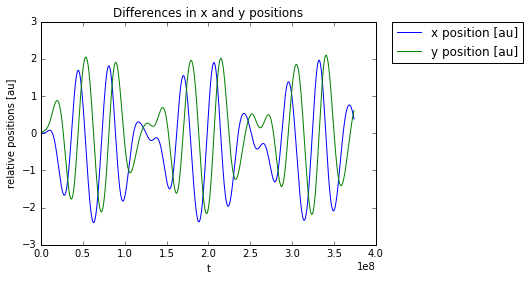

In [127]:
### Plot Difference bewteen the two systems [with and without Ceres size object]
plt.plot(t5, (Basic_Solar_System[:,12]-Test_Collision1[:,12]), color='b', label='x position [au]')
plt.plot(t5, (Basic_Solar_System[:,14]-Test_Collision1[:,14]), color='g', label='y position [au]')
plt.title('Differences in x and y positions')
plt.xlabel('t')
plt.ylabel('relative positions [au]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.show()

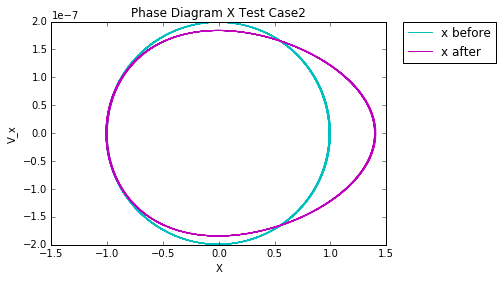

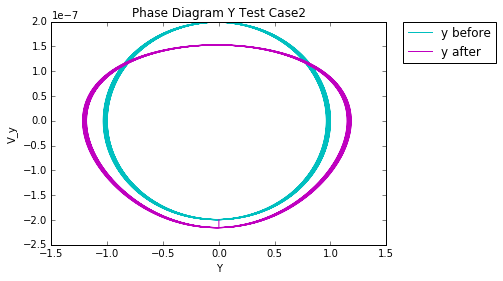

In [130]:
### Phase Diagram:
plt.plot(Basic_Solar_System[:,12], Basic_Solar_System[:,13], color='c', label='x before')
plt.plot(Test_Collision1[:,12], Test_Collision1[:,13], color='m', label='x after')
plt.title('Phase Diagram X Test Case2')
plt.xlabel('X')
plt.ylabel('V_x')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.show()

plt.plot(Basic_Solar_System[:,14], Basic_Solar_System[:,15], color='c', label='y before')
plt.plot(Test_Collision1[:,14], Test_Collision1[:,15], color='m', label='y after')
plt.title('Phase Diagram Y Test Case2')
plt.xlabel('Y')
plt.ylabel('V_y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.show()

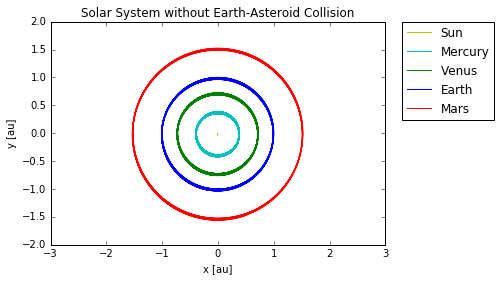

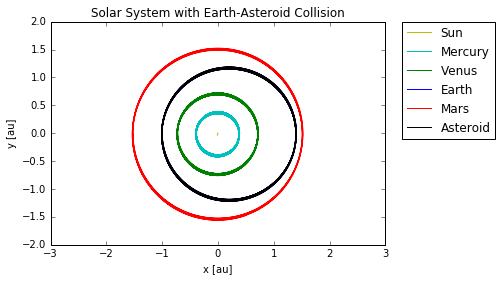

In [131]:
plt.plot(Basic_Solar_System[:,0],  Basic_Solar_System[:,2], color='y', label='Sun')
plt.plot(Basic_Solar_System[:,4],  Basic_Solar_System[:,6], color='c', label='Mercury')
plt.plot(Basic_Solar_System[:,8],  Basic_Solar_System[:,10], color='g', label='Venus')
plt.plot(Basic_Solar_System[:,12], Basic_Solar_System[:,14], color='b', label='Earth')
plt.plot(Basic_Solar_System[:,16], Basic_Solar_System[:,18], color='r', label='Mars')
#plt.plot(Basic_Solar_System[:,20], Basic_Solar_System[:,22], color='m', label='Jupiter')
#plt.plot(Basic_Solar_System[:,24], Basic_Solar_System[:,26], 'o', color='k', label='Saturn')
#plt.plot(Basic_Solar_System[:,28], Basic_Solar_System[:,30], 'o', color='c', label='Uranus')
#plt.plot(Basic_Solar_System[:,32], Basic_Solar_System[:,34], 'o', color='g', label='Neptune')

plt.title('Solar System without Earth-Asteroid Collision')
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

plt.plot(Test_Collision1[:,0],  Test_Collision1[:,2], color='y', label='Sun')
plt.plot(Test_Collision1[:,4],  Test_Collision1[:,6], color='c', label='Mercury')
plt.plot(Test_Collision1[:,8],  Test_Collision1[:,10], color='g', label='Venus')
plt.plot(Test_Collision1[:,12], Test_Collision1[:,14], color='b', label='Earth')
plt.plot(Test_Collision1[:,16], Test_Collision1[:,18], color='r', label='Mars')
#plt.plot(Test_Collision1[:,20], Test_Collision1[:,22], color='m', label='Jupiter')
#plt.plot(Test_Collision1[:,24], Test_Collision1[:,26], 'o', color='k', label='Saturn')
#plt.plot(Test_Collision1[:,28], Test_Collision1[:,30], 'o', color='c', label='Uranus')
#plt.plot(Test_Collision1[:,32], Test_Collision1[:,34], 'o', color='g', label='Neptune')
plt.plot(Test_Collision1[:,36], Test_Collision1[:,38], color='k', label='Asteroid')

plt.title('Solar System with Earth-Asteroid Collision')
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [132]:
def cartesianToPolar(x, y, dxdt, dydt):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    drdt = ((x*dxdt) + (y*dydt)) / r
    dthetadt = ((-(y/(x**2))*dxdt) / (1 + (y/x)**2)) + (((1/x)*dydt) / (1 + (y/x)**2))
    return np.array([r, theta, drdt, dthetadt])

In [133]:
polar_Test_Collision1 = cartesianToPolar(Test_Collision1[:,12], Test_Collision1[:,14], Test_Collision1[:,13], Test_Collision1[:,15])

In [134]:
polar_Solar_system = cartesianToPolar(Basic_Solar_System[:,12], Basic_Solar_System[:,14], Basic_Solar_System[:,13], Basic_Solar_System[:,15])

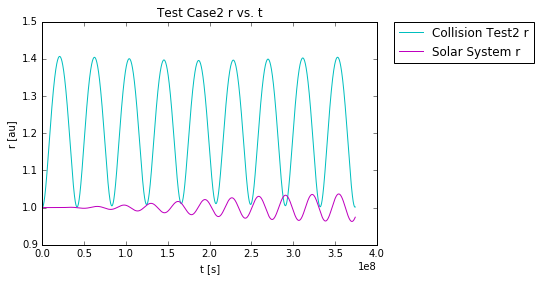

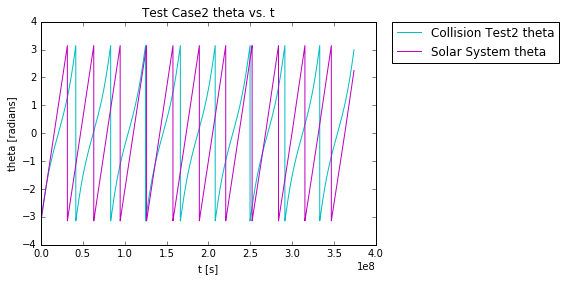

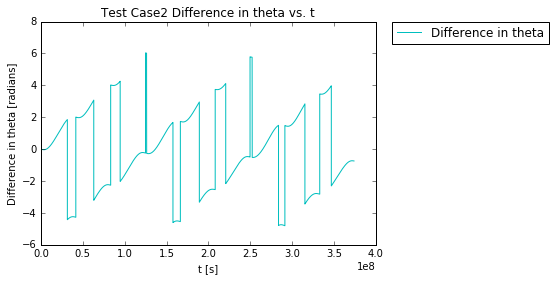

In [136]:
plt.plot(t5, polar_Test_Collision1[0], color='c', label='Collision Test2 r')
plt.plot(t5, polar_Solar_system[0], color='m', label='Solar System r')
plt.title('Test Case2 r vs. t')
plt.xlabel('t [s]')
plt.ylabel('r [au]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.show()

plt.plot(t5, polar_Test_Collision1[1], color='c', label='Collision Test2 theta')
plt.plot(t5, polar_Solar_system[1], color='m', label='Solar System theta')
plt.title('Test Case2 theta vs. t')
plt.xlabel('t [s]')
plt.ylabel('theta [radians]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.show()

plt.plot(t5, polar_Solar_system[1]-polar_Test_Collision1[1], color='c', label='Difference in theta')
plt.title('Test Case2 Difference in theta vs. t')
plt.xlabel('t [s]')
plt.ylabel('Difference in theta [radians]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.show()

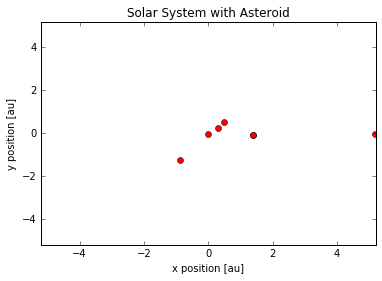

In [33]:
######  Check animation to see if this looks like a collision

import os, sys

ff_path = os.path.join('C:/', 'Program Files/','ImageMagick-7.0.3-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

imgk_path = os.path.join('C:/', 'Program Files/', 'ImageMagick-7.0.3-Q16', 'convert.exe')
plt.rcParams['animation.convert_path'] = imgk_path
if ff_path not in sys.path: sys.path.append(imgk_path)

fig = plt.figure()
ax = plt.axes(xlim=(-D5, D5), ylim=(-D5, D5))
data, = ax.plot([], [], 'ro')
ax.set_xlabel('x position [au]')
ax.set_ylabel('y position [au]')
ax.set_title('Solar System with Asteroid')

def init():
    data.set_data([], [])
    return data,

def animate(time):
    x = Test_Collision1[time, 0::4]
    y = Test_Collision1[time, 2::4]
    data.set_data(x, y)
    return data,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=5000, interval=20, blit=True)

FFwriter = animation.FFMpegWriter(fps=30)

anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents/', 'UPITT/', 'Fall 2016/', 'Physics 1321/',
                       'Destabilization', 'Moon-sized-Collision.mp4'), writer = FFwriter, extra_args=['-vcodec', 'libx264'])